# setup

In [1]:
!pip install nltk
!pip install seaborn

                    'c.
                 ,xNMM.
               .OMMMMo
               OMMM0,
     .;loddo:' loolloddol;.
   cKMMMMMMMMMMNWMMMMMMMMMM0:
 .KMMMMMMMMMMMMMMMMMMMMMMMWd.
 XMMMMMMMMMMMMMMMMMMMMMMMX.
;MMMMMMMMMMMMMMMMMMMMMMMM:
:MMMMMMMMMMMMMMMMMMMMMMMM:
.MMMMMMMMMMMMMMMMMMMMMMMMX.
 kMMMMMMMMMMMMMMMMMMMMMMMMWd.
 .XMMMMMMMMMMMMMMMMMMMMMMMMMMk
  .XMMMMMMMMMMMMMMMMMMMMMMMMK.
    kMMMMMMMMMMMMMMMMMMMMMMd
     ;KMMMMMMMWXXWMMMMMMMk.
       .cooc,.    .,coo:.
matteoomenetti@Matteos-MacBook-Pro.local 
---------------------------------------- 
OS: macOS 12.3.1 21E258 x86_64 
Host: MacBookPro15,1 
Kernel: 21.4.0 
Uptime: 8 days, 7 hours, 59 mins 
Packages: 117 (brew) 
Shell: fish 3.1.0 
Resolution: 1680x1050@2x 
DE: Aqua 
WM: Quartz Compositor 
WM Theme: Blue (Dark) 
Terminal: Apple_Terminal 
Terminal Font: SFMono-Regular 
CPU: Intel i7-8750H (12) @ 2.20GHz 
GPU: Intel UHD Graphics 630, Radeon Pro 555X 
Memory: 5869MiB / 16384MiB 

                        
                        


   

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matteoomenetti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matteoomenetti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
DATA_PATH = "/Users/matteoomenetti/Documents/ETH/second/gess/dataset/{}"

is_preprocess_enabled = True 

# Read and preprocess data

In [5]:
# read the data
train_df = pd.read_csv(DATA_PATH.format("train_tweets_prep.csv"))
train_df = train_df[train_df.tweet.isnull() == False]
train_df = train_df[train_df.tweet != "None"]
test_df = pd.read_csv(DATA_PATH.format("test_tweets_prep.csv"))

print(train_df.shape)
print(test_df.shape)
train_df.head(5)

(1350617, 76)
(199863, 76)


,Unnamed: 0,id,screen_name,description,location,followers_count,friends_count,statuses_count,tweet,label,location_enc,created_at_year,created_at_month,created_at_day,created_at_date,created_at_hour,desc_len,desc_clean_len,desc_hashtags_start_count,desc_hashtags_end_count,desc_hashtags,desc_mentions,desc_cashtags,desc_links,desc_emojis,desc_unk_chars_ratio,tokens_count,avg_token_len,tokens_diff_ratio,adj_count,adp_count,adv_count,aux_count,conj_count,cconj_count,det_count,intj_count,noun_count,num_count,part_count,pron_count,propn_count,punct_count,sconj_count,sym_count,verb_count,x_count,space_count,desc_hashtags_count,desc_mentions_count,desc_cashtags_count,desc_links_count,desc_emojis_count,avg_daily_followers,avg_daily_friends,avg_daily_statuses,text_sat,is_reply,replies,is_rt,retweet,is_mt,hashtags_start_count,hashtags_end_count,hashtags,mentions,cashtags,links,has_ellipsis,emojis,unk_chars_ratio,hashtags_count,mentions_count,cashtags_count,links_count,emojis_count
0,0,24691376,vangoghmuseum,Van Gogh Museum Amsterdam houses the world's l...,Amsterdam,1647822,1536,16822,Gustave Courbet was often called 'the most arr...,0,171,2009,3,16,4825,818,73,73,0,0,[],[],[],[],[],1.0,56,3.785714,0.714286,2,7,3,1,0,0,6,0,6,1,1,1,10,14,0,0,4,0,0,0,0,0,0,0,341.518,0.318,3.486,1.170833,False,NaN,False,NaN,False,0,0,['MuséeFabre'],[],[],['https://t.co/0YuOEv9mXU'],False,"['triumph', 'sunflower']",1.0,1,0,0,1,2
1,1,259540958,IncredibleCulk,"Best Boyfriend, Pizza Band Member, Painter, 1 ...",Heading to the corner,808966,146,2223,An animal MackLibs,0,1029,2011,3,2,4109,193,135,134,0,0,['1'],[],[],[],[],1.0,3,5.333333,1.000000,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,196.877,0.036,0.541,0.079167,False,NaN,False,NaN,False,0,1,['MackLibs'],[],[],[],False,[],1.0,1,0,0,0,0
2,2,424423803,CyaSteve,Broadcast Producer | Blizzard Entertainment. J...,"Los Angeles, CA",2551,462,26710,I hope it's 900 gems.,1,1416,2011,11,29,3837,1152,85,84,0,0,[],[],[],[],[],1.0,7,2.428571,1.000000,0,0,0,1,0,0,0,0,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0.665,0.120,6.961,0.087500,True,"['nightmarex334', 'pathofexile']",False,NaN,False,0,0,[],[],[],[],False,[],1.0,0,0,0,0,0
3,3,281902422,SwatiJaiHind,"Chairperson, Delhi Commission for Women","New Delhi, India",326003,381,8848,Delhi : Social Welfare Minister AdvRajendraPal...,0,1724,2011,4,14,4066,355,39,39,0,0,[],[],[],[],[],1.0,17,5.823529,1.000000,1,1,0,0,0,1,2,0,3,0,0,0,7,1,0,0,1,0,0,0,0,0,0,0,80.178,0.094,2.176,0.583333,False,NaN,True,TheDailyPioneer,False,1,0,['Delhi'],"['AdvRajendraPal', 'SwatiJaiHind']",[],[],True,[],1.0,1,2,0,0,0
4,4,173195708,Nigella_Lawson,Nigella Lawson's eating - and other - updates....,London,2672077,872,36654,"I wouldn't even consider going on holiday now,...",0,1381,2010,7,31,4323,1088,155,154,0,0,[],['curtisbrown'],[],[],[],1.0,16,3.687500,0.937500,0,1,2,1,0,1,1,0,2,0,1,2,0,1,0,0,4,0,0,0,1,0,0,0,618.107,0.202,8.479,0.400000,False,NaN,False,NaN,False,0,0,[],[],[],['https://t.co/RFXOHTThMW'],False,[],1.0,0,0,0,1,0


In [6]:
# get unique users
train_df = train_df.drop_duplicates(subset=['id'])
print(train_df.shape)

test_df = test_df.drop_duplicates(subset=['id'])
print(test_df.shape)

(8207, 76)
(1183, 76)


In [7]:
# get bots only
train_df = train_df.loc[train_df['label'] == 1]
print(train_df.shape)

test_df = test_df.loc[test_df['label'] == 1]
print(test_df.shape)

train_df.head(5)

(4620, 76)
(640, 76)


,Unnamed: 0,id,screen_name,description,location,followers_count,friends_count,statuses_count,tweet,label,location_enc,created_at_year,created_at_month,created_at_day,created_at_date,created_at_hour,desc_len,desc_clean_len,desc_hashtags_start_count,desc_hashtags_end_count,desc_hashtags,desc_mentions,desc_cashtags,desc_links,desc_emojis,desc_unk_chars_ratio,tokens_count,avg_token_len,tokens_diff_ratio,adj_count,adp_count,adv_count,aux_count,conj_count,cconj_count,det_count,intj_count,noun_count,num_count,part_count,pron_count,propn_count,punct_count,sconj_count,sym_count,verb_count,x_count,space_count,desc_hashtags_count,desc_mentions_count,desc_cashtags_count,desc_links_count,desc_emojis_count,avg_daily_followers,avg_daily_friends,avg_daily_statuses,text_sat,is_reply,replies,is_rt,retweet,is_mt,hashtags_start_count,hashtags_end_count,hashtags,mentions,cashtags,links,has_ellipsis,emojis,unk_chars_ratio,hashtags_count,mentions_count,cashtags_count,links_count,emojis_count
2,2,424423803,CyaSteve,Broadcast Producer | Blizzard Entertainment. J...,"Los Angeles, CA",2551,462,26710,I hope it's 900 gems.,1,1416,2011,11,29,3837,1152,85,84,0,0,[],[],[],[],[],1.0,7,2.428571,1.000000,0,0,0,1,0,0,0,0,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0.665,0.120,6.961,0.087500,True,"['nightmarex334', 'pathofexile']",False,NaN,False,0,0,[],[],[],[],False,[],1.0,0,0,0,0,0
7,7,132922753,NetAppCloud,Any Cloud. One Experience. Integrate. Protect....,"Sunnyvale, CA",8159,3099,8982,Looking for a Cloud Migration tool that is wel...,1,2396,2010,4,14,4431,888,56,56,0,0,[],[],[],[],[],1.0,22,4.681818,0.863636,1,2,1,1,0,0,2,0,1,0,0,1,9,1,1,0,2,0,0,0,0,0,0,0,1.841,0.699,2.027,0.583333,False,NaN,True,ITCenSta,False,0,0,['Cloud'],['NetApp'],[],[],True,[],1.0,1,1,0,0,0
8,8,324446553,StaffsToffee,COYB!!!,NaN,134,534,1044,| Win an away shirt signed by CenkTosun_! Sim...,1,3130,2011,6,26,3993,1007,7,7,0,0,[],[],[],[],[],1.0,28,3.500000,0.964286,2,3,1,1,0,1,3,0,4,0,1,0,4,3,0,0,4,0,1,0,0,0,0,0,0.034,0.134,0.261,0.583333,False,NaN,True,Everton,False,0,0,[],"['CenkTosun_', 'EvertonDirect']",[],[],True,['tr'],1.0,0,2,0,0,1
10,10,2450551725,robynthomps59,Stands left of center. Runs w/ scissors. No DM...,"Maryland, USA",5641,6197,27502,Scary,1,1505,2014,3,31,2984,1179,156,154,0,2,"['Resist', 'Impeach45']",[],[],[],[],1.0,1,5.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1.890,2.077,9.216,0.020833,True,['orangepeel18'],False,NaN,False,0,0,[],[],[],[],False,[],1.0,0,0,0,0,0
13,13,3408565337,barbierjeanf,My shop is a kind of magic box or several arts...,Paris,8513,8929,16624,Voici ce que je viens d'ajouter dans ma boutiq...,1,1910,2015,8,8,2489,755,85,85,0,0,[],[],[],[],[],1.0,21,5.000000,1.000000,2,0,0,0,0,0,0,1,5,0,0,0,11,2,0,0,0,0,0,0,0,0,0,0,3.420,3.587,6.679,0.583333,False,NaN,True,JeanfbJf,False,0,0,['boutiqueetsy'],[],[],[],True,[],1.0,1,0,0,0,0


In [8]:
# as you can see most bots are from the US, therefore doing a clustering on location makes no sense, plus you
# can changhe your location to whatever you like such as "My House", "♡🌻🌵 NW Arizona 🌵🌻", etc...
pd.set_option('display.max_rows', None)
train_df['location'].value_counts()

United States                                                                             88
USA                                                                                       42
London, England                                                                           34
New York, NY                                                                              34
Los Angeles, CA                                                                           32
Washington, DC                                                                            31
London                                                                                    31
California, USA                                                                           30
United Kingdom                                                                            25
Florida, USA                                                                              23
New York                                                              

# clustering on tweet information

In [9]:
# get only the tweet column and go from panda to list of strings
train = list(map(lambda x : str(x[0]), train_df[['tweet']].values.tolist()))
test = list(map(lambda x : str(x[0]), test_df[['tweet']].values.tolist()))

for i in range(50):
    print(train[i])
# for i in range(len(train)):
#     if train[i] == "None":
#         print(i)

I hope it's 900 gems.
Looking for a Cloud Migration tool that is well integrated with Azure? This VP Cloud Operations writes that Azure NetApp Fi
 | Win an away shirt signed by CenkTosun_! Simply RT and follow EvertonDirect to be in with a chance. Shop the away kit:
Scary
Voici ce que je viens d'ajouter dans ma boutiqueetsy : Collier Elisabeth d'Angleterre la Reine Vierge, fille d'anne Boleyn e
THATSAWINNER!!! 
Getting out of mtgs/off calls and wondering how 30+emails and a full vm box happened so fast? grinding
It's Nip Day 
"Name: Investment Casting Stainless Steel Castings Type: Forced Structural Components Brand: Precision Casting Customization: Can be prepared according to customer's needs 
Wonder how things might've turned out had one of Suarez, Coutinho, Alba, or Dembele taken one of their huge chances. Shows how thin the margins can be in football. From CL glory to the apocalypse in one year and just one better kick of a football could've prevented all of it.
JeffBezanson is li

## clean dataset and apply tokenization

In [10]:
# clean the dataset, stop word removal, tokenizer etc..
if is_preprocess_enabled:
    
    # Lowercasing sentence and remove unnecessary spaces
    train = list(map(lambda x : x.lower().strip(), train))
    test = list(map(lambda x : x.lower().strip(), test))

    # remove links
    import re
    train = list(map(lambda x : re.sub(r"http\S+", "", x), train))
    test = list(map(lambda x : re.sub(r"http\S+", "", x), test))
    
    # remove special chars and numbers
    train = list(map(lambda x : re.sub("[^A-Za-z]+", " ", x), train))
    test = list(map(lambda x : re.sub("[^A-Za-z]+", " ", x), test))

    from nltk.tokenize import RegexpTokenizer
    # Tokenizing sentence
    tokenizer = RegexpTokenizer(r'\w+')
    train = list(map(lambda x : tokenizer.tokenize(x), train))
    test = list(map(lambda x : tokenizer.tokenize(x), test))
    
    from nltk.corpus import stopwords
    # Removing stopwords
    stopwords_set = stopwords.words('english')
    train = list(map(lambda x : [w for w in x if not w in stopwords_set], train))
    test = list(map(lambda x : [w for w in x if not w in stopwords_set], test))

    from nltk.stem import WordNetLemmatizer
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    train = list(map(lambda x  : [lemmatizer.lemmatize(w) for w in x], train))
    test = list(map(lambda x : [lemmatizer.lemmatize(w) for w in x], test))
    
    # join the lemmatized words back into a tweet and remove unnecessary spaces
    train = list(map(lambda x : " ".join(x).strip(), train))
    test = list(map(lambda x : " ".join(x).strip(), test))
    
    print(len(train))
    print(len(test))
    for i in range(5):
        print(train[i])

4620
640
hope gem
looking cloud migration tool well integrated azure vp cloud operation writes azure netapp fi
win away shirt signed cenktosun simply rt follow evertondirect chance shop away kit
scary
voici ce que je viens ajouter dans boutiqueetsy collier elisabeth angleterre la reine vierge fille anne boleyn e


## TF-IDF Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
# X is a sparse matrix
X = vectorizer.fit_transform(train)

for i in range(3):
    print(X[i])

  (0, 624)	1.0
  (0, 1439)	0.4995756339782615
  (0, 1328)	0.6879349787565293
  (0, 776)	0.5264690408167148
  (0, 1174)	0.32138250241133093
  (0, 207)	0.28897280375682577
  (0, 496)	0.2633233346585898
  (0, 1113)	0.2737569272023082
  (0, 1188)	0.350327111525317
  (0, 1184)	0.3385763245113186
  (0, 1169)	0.357534782883877
  (0, 93)	0.4862856990097548
  (0, 1447)	0.2593415844851882


## KMeans

In [52]:
from sklearn.cluster import KMeans

# initialize kmeans with 2 centroids
kmeans = KMeans(n_clusters=2, random_state=677)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [53]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [54]:
# assign clusters and pca vectors to our dataframe 
df = pd.DataFrame()  
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [56]:
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

for i in range(len(clusters)):
    if (clusters[i] == 1):
        print(train[i])

{0: 4560, 1: 60}
hello everyone thank following new page farvermike take care
thank
thank ambjohnbolton writing book intention hurt realdonaldtrump bet never thought
thank pornhub
thank service
biggest fan week matmuratore pactvgovtaccess cayenne thank via
thank sacrifice bravery remember honor fallen hero gave life country memorialday
thank markus katharina saintsfc
thank gorgeous
thank u
thank much everyone drawn something like check tag often
awe thank much
could someone please create james please need angst banter harry dad thank
awesomely tireless please tell vitamin take thank including fld amp rtd virgothesixth
thank japanese friend thank
writerslift reached time thank writingcommunity dear author thank shamel
fernandotoda hello thank much follow stay bright unique lt
thank bro
hey nakedimasipa thank entering competition please send contact detail kirsten naglecardova tv asap expressoshow
thank beautiful
live thank abcnetwork
beautiful thank killermike
mirchisayema rekhta thank 

In [57]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(30)


Cluster 0
want,way,week,best,please,look,make,would,need,back,know,say,de,via,good,see,today,great,trump,go,year,people,time,love,day,one,new,get,like,amp

Cluster 1
life,support,take,everyone,made,way,send,happy,live,service,song,math,bro,sharing,si,realdonaldtrump,father,another,christmas,fan,hello,following,saintsfc,god,day,much,beautiful,new,please,thank


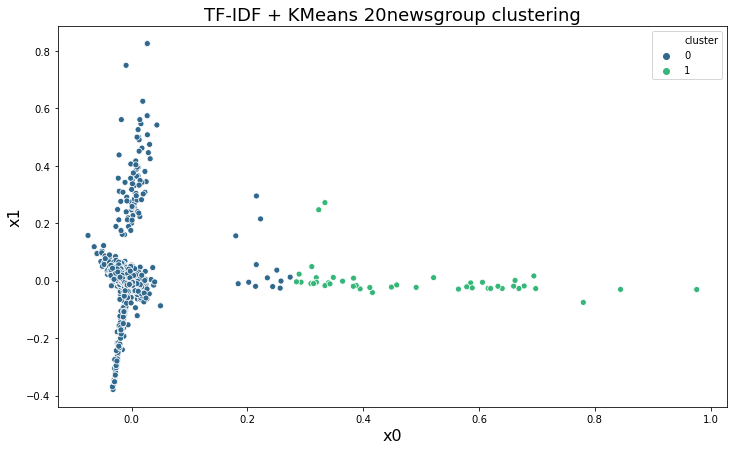

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()